In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
import os
import numpy as np
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing import image
from PIL import Image,ImageOps
import cv2
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, ELU, Dropout, Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator,  array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical

In [4]:
PARENT_DATA_DIR ='/content/drive/MyDrive/Dataset_patches/'
TRAIN_DATA_DIR = os.path.join(PARENT_DATA_DIR, 'Training')
VALID_DATA_DIR = os.path.join(PARENT_DATA_DIR, 'Validation')

In [5]:
IMG_SIZE = 96
CATEGORIES = []
for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
print(CATEGORIES)

['Foot_Ulcer', 'Normal']


In [6]:
classes = len(CATEGORIES)
classes

2

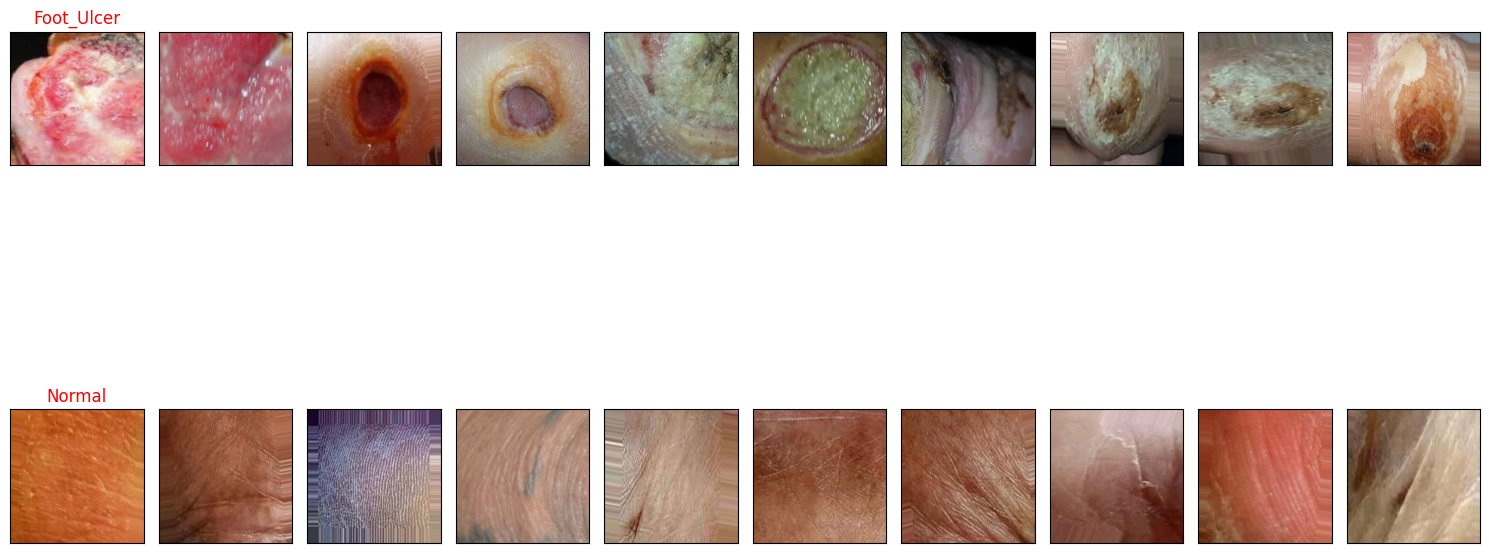

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 10), facecolor='white')
i = 1
num_images_per_class = 10

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    image_list = os.listdir(path)
    if len(image_list) < num_images_per_class:
        continue
    random.shuffle(image_list)
    image_list = image_list[:num_images_per_class]

    for img_name in image_list:
        img_array = cv2.imread(os.path.join(path, img_name))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        white_background = 255 * np.ones_like(img_array)

        x_offset = (white_background.shape[1] - img_array.shape[1]) // 2
        y_offset = (white_background.shape[0] - img_array.shape[0]) // 2
        white_background[y_offset:y_offset + img_array.shape[0], x_offset:x_offset + img_array.shape[1]] = img_array

        plt.subplot(len(CATEGORIES), num_images_per_class, i)
        plt.imshow(white_background)

        if i % num_images_per_class == 1:
            plt.title(c, color='red')

        plt.xticks([])
        plt.yticks([])
        i += 1

plt.tight_layout()
plt.show()

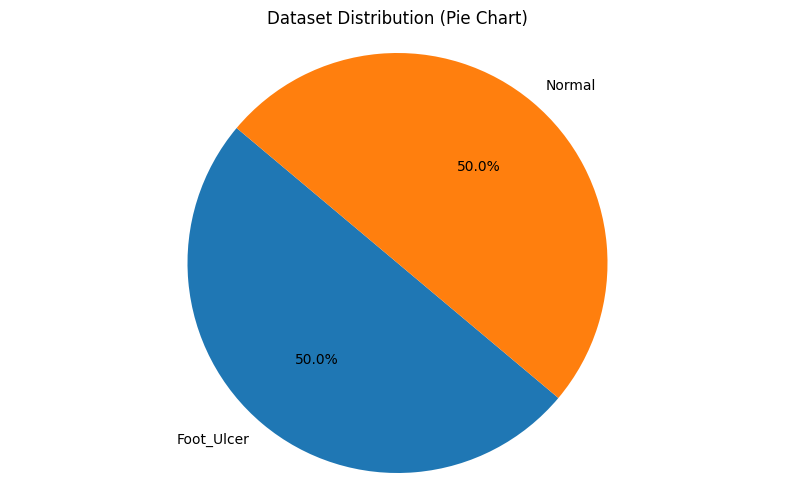

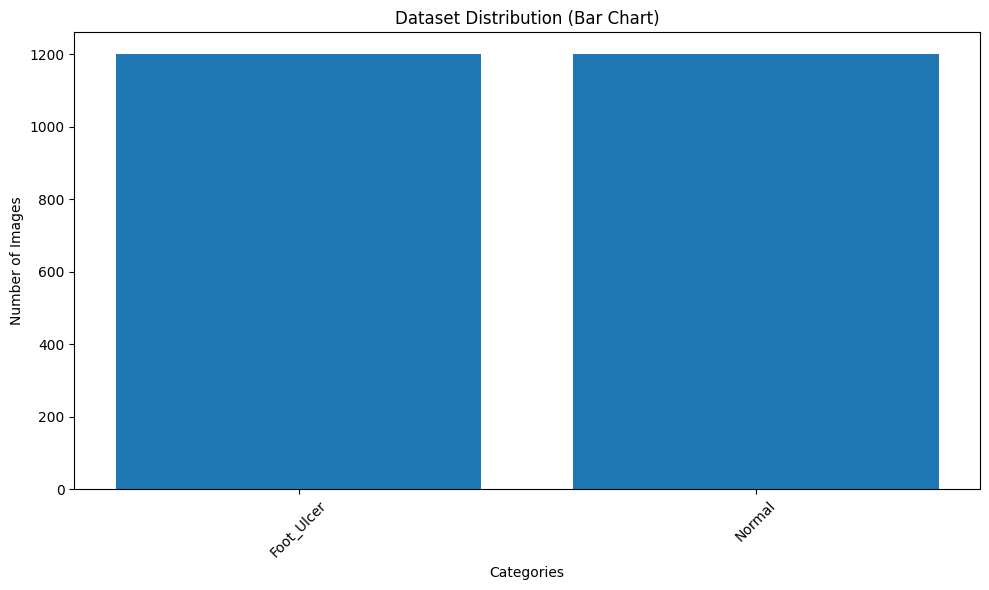

In [ ]:
category_counts = {}
for category in CATEGORIES:
    category_path = os.path.join(TRAIN_DATA_DIR, category)
    num_images = len(os.listdir(category_path))
    category_counts[category] = num_images


plt.figure(figsize=(10, 6), facecolor='white')
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Dataset Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Dataset Distribution (Bar Chart)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(training_data))

100%|██████████| 1200/1200 [00:31<00:00, 38.69it/s] 

2400


In [8]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass

print(len(test_data))

100%|██████████| 300/300 [00:06<00:00, 43.00it/s] 

600


In [9]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (2400, 96, 96, 3) Y_train= (2400,)


In [10]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")
X_train, X_test = X_train / 255.0, X_test / 255.0

X_test= (600, 96, 96, 3) Y_test= (600,)


Efficientnet


In [11]:
pip install -q efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


### Enet B0

In [12]:
import efficientnet.tfkeras as efn

enet = efn.EfficientNetB0(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet',
    include_top=False
)

for layer in enet.layers:
    layer.trainable = False

# Build the model
x = enet.output
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
y = tf.keras.layers.Dense(classes, activation='softmax')(x)

e_model_b0 = tf.keras.Model(inputs=enet.input, outputs=y)

# Compile the model
e_model_b0.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
e_model_b0.summary()

16804768/16804768 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 48, 48, 32)           864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 48, 48, 32)           128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  

In [13]:
efficientnet_b0 = e_model_b0.fit(x=X_train, y=Y_train, epochs=200, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/200
38/38 [==============================] - 29s 321ms/step - loss: 0.2033 - accuracy: 0.9304 - val_loss: 0.0680 - val_accuracy: 0.9750
Epoch 2/200
38/38 [==============================] - 2s 57ms/step - loss: 0.0494 - accuracy: 0.9821 - val_loss: 0.0505 - val_accuracy: 0.9833
Epoch 3/200
38/38 [==============================] - 2s 46ms/step - loss: 0.0436 - accuracy: 0.9879 - val_loss: 0.0551 - val_accuracy: 0.9817
Epoch 4/200
38/38 [==============================] - 2s 44ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.0437 - val_accuracy: 0.9917
Epoch 5/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoch 6/200
38/38 [==============================] - 2s 41ms/step - loss: 0.0159 - accuracy: 0.9937 - val_loss: 0.0475 - val_accuracy: 0.9867
Epoch 7/200
38/38 [==============================] - 2s 40ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0368 - val_accuracy: 0.9917
Epoc

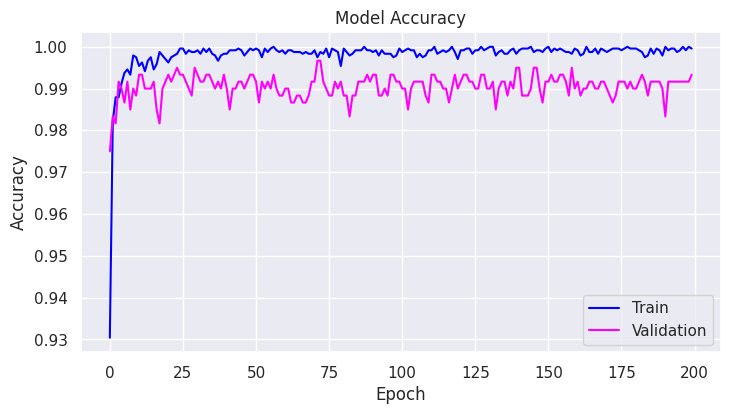

In [14]:
import seaborn as sns
#  "Accuracy"
plt.figure(figsize=[8, 4])
sns.set_theme()
plt.plot(efficientnet_b0.history['accuracy'], color="blue")
plt.plot(efficientnet_b0.history['val_accuracy'] , color="magenta")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#plt.show()
plt.gca().set_position([0.1, 0.12, 0.8, 0.8])
#plt.close()

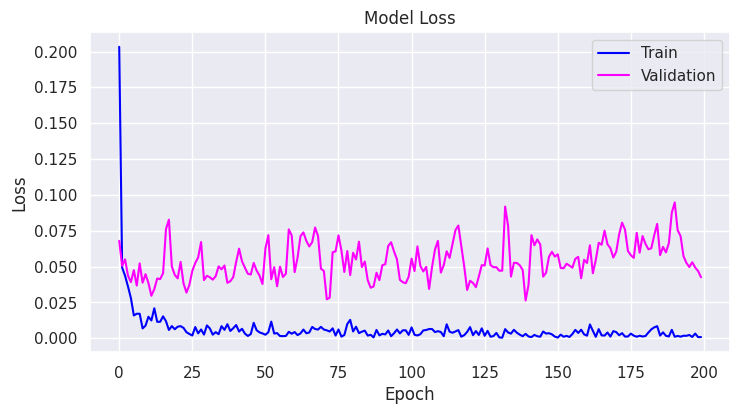

In [15]:
# "Loss"
plt.figure(figsize=[8, 4])
sns.set_theme()
plt.plot(efficientnet_b0.history['loss'], color="blue")
plt.plot(efficientnet_b0.history['val_loss'], color="magenta")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()
plt.gca().set_position([0.1, 0.12, 0.8, 0.8])

In [36]:
from sklearn.svm import SVC

features_train = e_model_b0.predict(X_train)
features_test = e_model_b0.predict(X_test)
features_train_flat = features_train.reshape(features_train.shape[0], -1)
features_test_flat = features_test.reshape(features_test.shape[0], -1)
svm = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
svm.fit(features_train_flat, Y_train)

19/19 [==============================] - 0s 21ms/step


SVC(gamma='auto', probability=True)

In [37]:
from sklearn.metrics import hinge_loss

train_accuracy = svm.score(features_train_flat, Y_train)
print(f"Train Accuracy: {train_accuracy}")

test_accuracy = svm.score(features_test_flat, Y_test)
print(f"Test Accuracy: {test_accuracy}")


if Y_train.ndim == 2:
    Y_train_integer = np.argmax(Y_train, axis=1)
else:
    Y_train_integer = Y_train

if Y_test.ndim == 2:
    Y_test_integer = np.argmax(Y_test, axis=1)
else:
    Y_test_integer = Y_test

train_loss = hinge_loss(Y_train_integer, svm.decision_function(features_train_flat))
print(f"Train Loss: {train_loss}")

test_loss = hinge_loss(Y_test_integer, svm.decision_function(features_test_flat))
print(f"Test Loss: {test_loss}")

Train Accuracy: 1.0
Test Accuracy: 0.9933333333333333
Train Loss: 3.021903030142603e-08
Test Loss: 0.013747268831414028


In [38]:
print("Number of features expected by the model:", svm.n_features_in_)

Number of features expected by the model: 2


In [32]:
y_scores = svm.predict_proba(features_test_flat)


In [39]:
testX_arg = np.argmax(Y_test)
y_pred = svm.predict(features_test_flat)
y_true = np.argmax(Y_test, axis=0)
print(y_pred)
print(y_pred.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [40]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[296,   4],
       [  0, 300]])

In [41]:
print(classification_report(Y_test, y_pred,  digits=7,target_names = CATEGORIES))

              precision    recall  f1-score   support

  Foot_Ulcer  1.0000000 0.9866667 0.9932886       300
      Normal  0.9868421 1.0000000 0.9933775       300

    accuracy                      0.9933333       600
   macro avg  0.9934211 0.9933333 0.9933330       600
weighted avg  0.9934211 0.9933333 0.9933330       600



In [42]:
import pandas as pd
cm = pd.DataFrame(cm , index = CATEGORIES , columns = CATEGORIES)

<Axes: title={'center': 'Confusion Matrix'}>

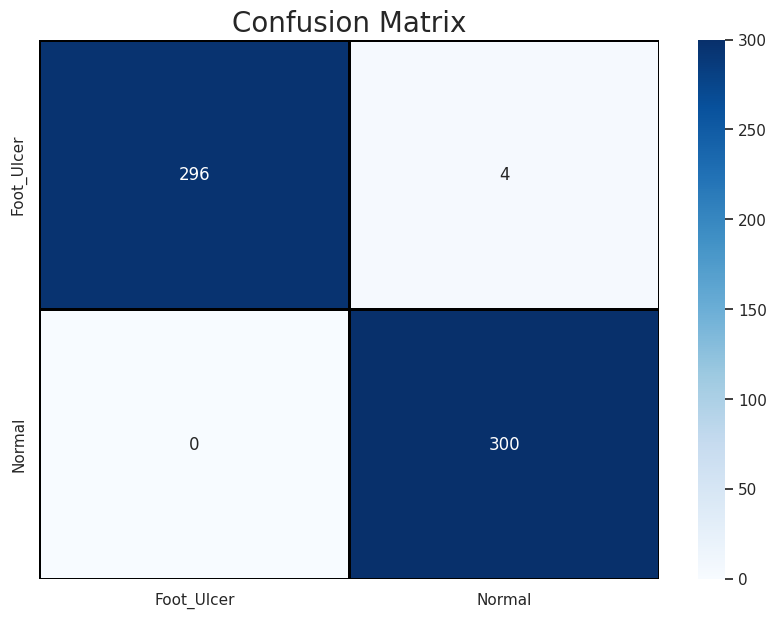

In [43]:
plt.figure(figsize = (10,7))
ct= CATEGORIES
plt.title("Confusion Matrix", fontsize =20)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = ct,yticklabels = ct)

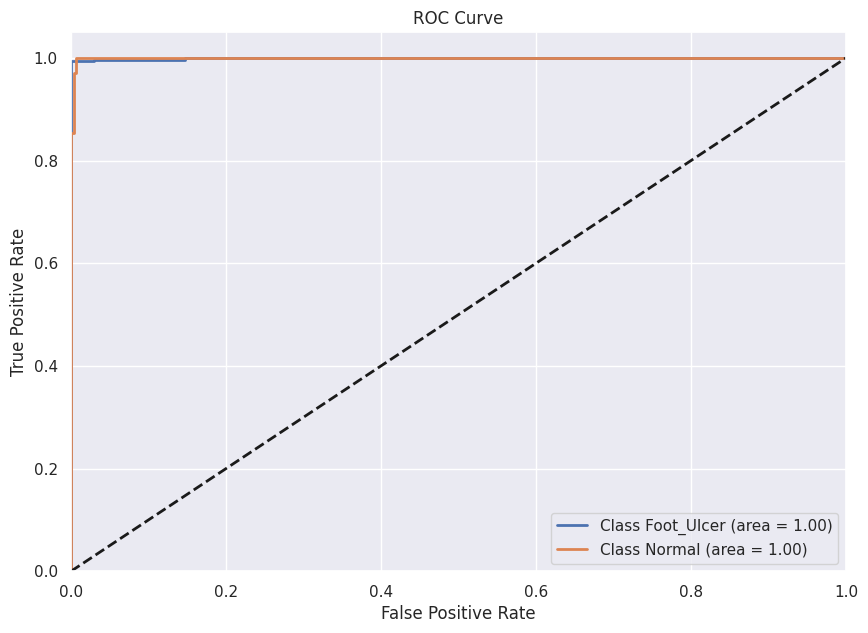

In [33]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test == i, y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 7))
for i in range(classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {CATEGORIES[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


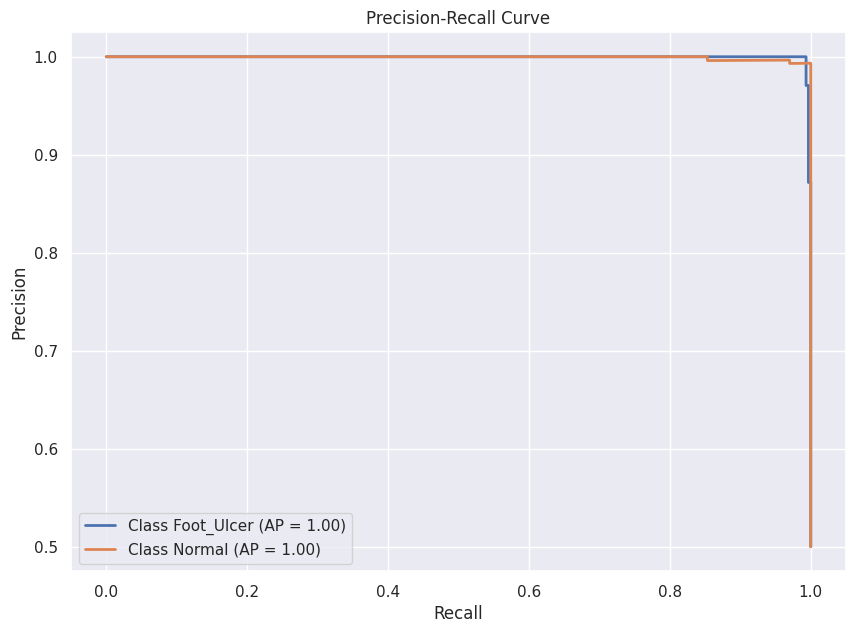

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute predicted probabilities
y_scores = svm.predict_proba(features_test_flat)

# Compute Precision-Recall and plot curve for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test == i, y_scores[:, i])
    average_precision[i] = average_precision_score(Y_test == i, y_scores[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {CATEGORIES[i]} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
